In [1]:
import pandas as pd
import numpy as np
import sympy as sp
from numpy import *
import math
import warnings
from numpy.polynomial import Polynomial
from sympy import *

import lensLibrary as llib

In [2]:
lincaustics = 1000
precisao = 1e-4
pontosLC = 500
magnificacao = np.zeros(pontosLC)

condicao = 0.1

In [3]:
rho = 0.05
mu = -0.3
alpha = 0.95
tE = 53
t0 = tE/2
area = 2

n = 2

tEx = np.arange(-tE/2, tE/2, (tE/pontosLC))

In [4]:
Xp, Yp = llib.path(mu, alpha, tE, t0, pontosLC, area, tEx)

In [5]:
e2, e3 = 0.001, 0
e1 = 1 - e2 - e3

e = np.array([e1, e2, e3])

xe1, xe2, xe3 = 0.8, -0.8, 0
ye1, ye2, ye3 = 0.0, 0.0, 0.0

lentes = {e1, e2, e3, xe1, xe2, xe3, ye1, ye2, ye3}

In [6]:
r1, r2, r3 = xe1, xe2, 0
rs = np.array([r1, r2, r3])

z1 = complex(xe1, ye1)
z2 = complex(xe2, ye2)
z3 = complex(xe3, ye3)

z = symbols('z')
zs = np.array([z-r1, z-r2, z-r3])

In [7]:
G, H = llib.GeH(lentes, n, e, zs, z)

In [8]:
eta = np.array(llib.ETA(G,H))

In [9]:
causticLocation = llib.caustic(G, H, lincaustics, lentes, e)

for i in range(pontosLC):
  disfromcaustic = np.sqrt((Xp[i] - causticLocation.real)**2 + (Yp[i] - causticLocation.imag)**2)

  if min(disfromcaustic) >= (rho+condicao):

    MagTotal = llib.jacobian(Xp, Yp, e, z1, z2, z3, eta, G, H, precisao, i, rs)

    magnificacao[i] = MagTotal

  else:
    magnificacao[i] = 0

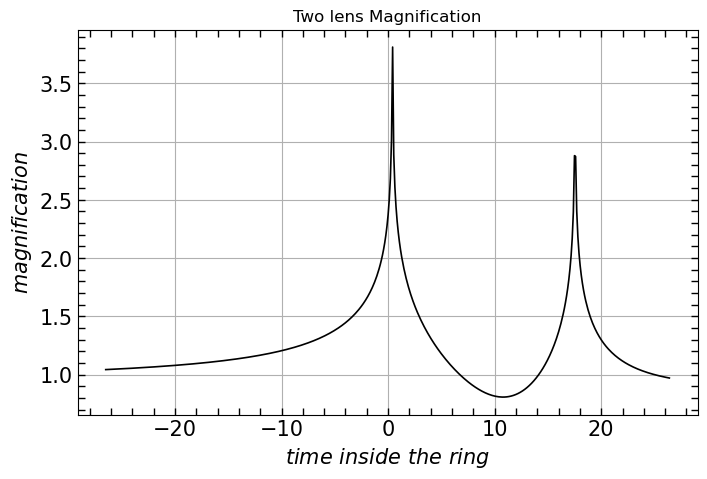

In [10]:
import matplotlib.pyplot as plt

llib.plot_ticks()
plt.grid(True)

# plt.xticks(np.arange(-20, 25, 10))
# plt.yticks(np.arange(0, 4, 0.4))

plt.title('Two lens Magnification')
plt.xlabel(r'$time\ inside\ the\ ring$', {'color': 'k', 'fontsize': 15})
plt.ylabel(r'$magnification$', {'color': 'k', 'fontsize': 15})
plt.xticks(size=15)
plt.yticks(size=15)

plt.plot(tEx, np.log10(abs(magnificacao)), "-k", lw = 1.2)
plt.show()